In [10]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

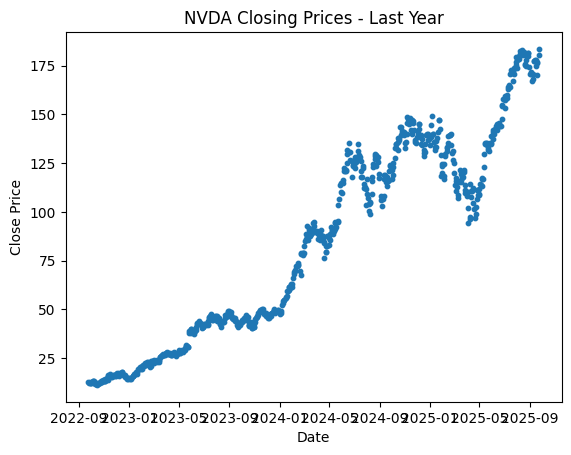

In [23]:
tiker = yf.Ticker("NVDA")

hd = tiker.history(period="3y")

plt.scatter(hd.index, hd['Close'], s=10)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("NVDA Closing Prices - Last Year")
plt.show()


Training MSE: 139.69
Testing MSE: 126.02
Training R²: 0.9463
Testing R²: 0.9537


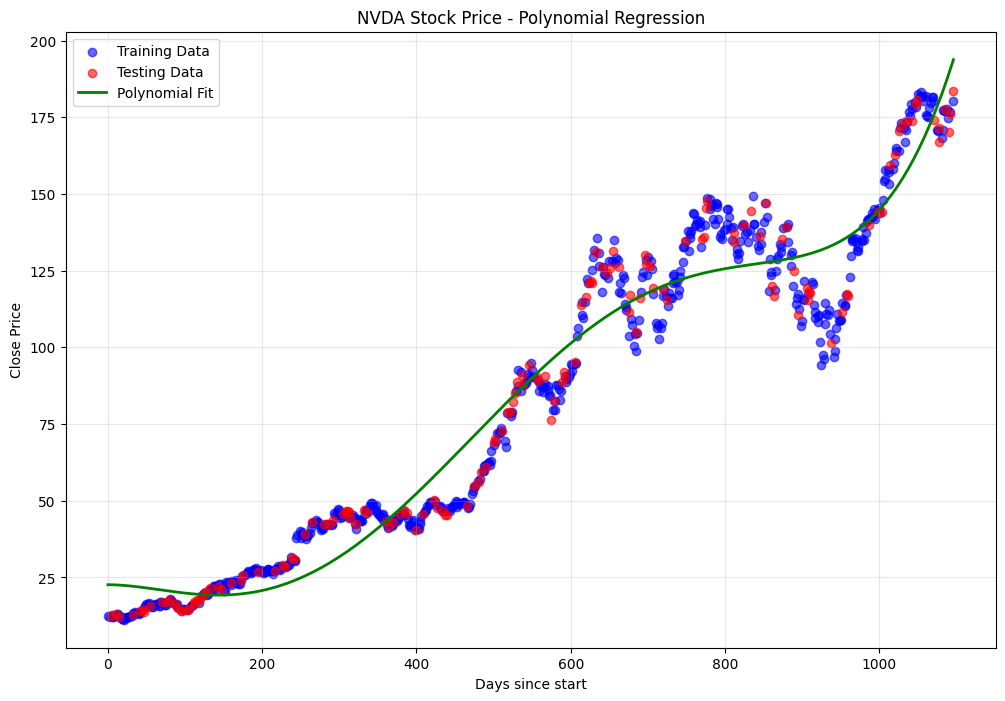

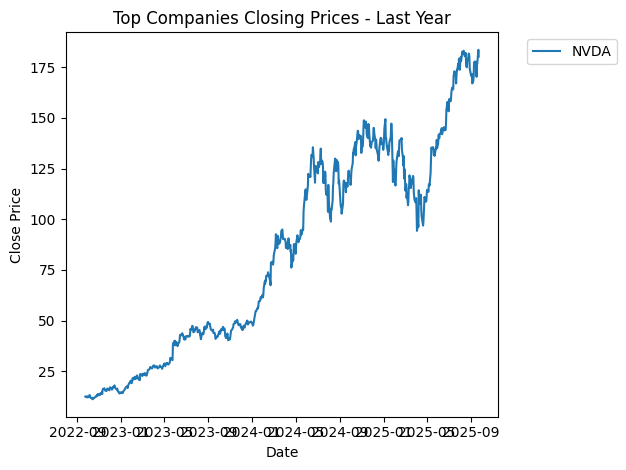

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data - convert datetime index to numerical values
X = np.array([(date - hd.index[0]).days for date in hd.index]).reshape(-1, 1)
y = hd['Close'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
pf = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")

# Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(X_train.flatten(), y_train, alpha=0.6, label='Training Data', color='blue')
plt.scatter(X_test.flatten(), y_test, alpha=0.6, label='Testing Data', color='red')

# Create smooth curve for prediction line
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_plot_poly = pf.transform(X_plot)
y_plot_pred = model.predict(X_plot_poly)

plt.plot(X_plot.flatten(), y_plot_pred, color='green', linewidth=2, label='Polynomial Fit')
plt.xlabel('Days since start')
plt.ylabel('Close Price')
plt.title('NVDA Stock Price - Polynomial Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()    
plt.plot(hd['Close'], label="NVDA")

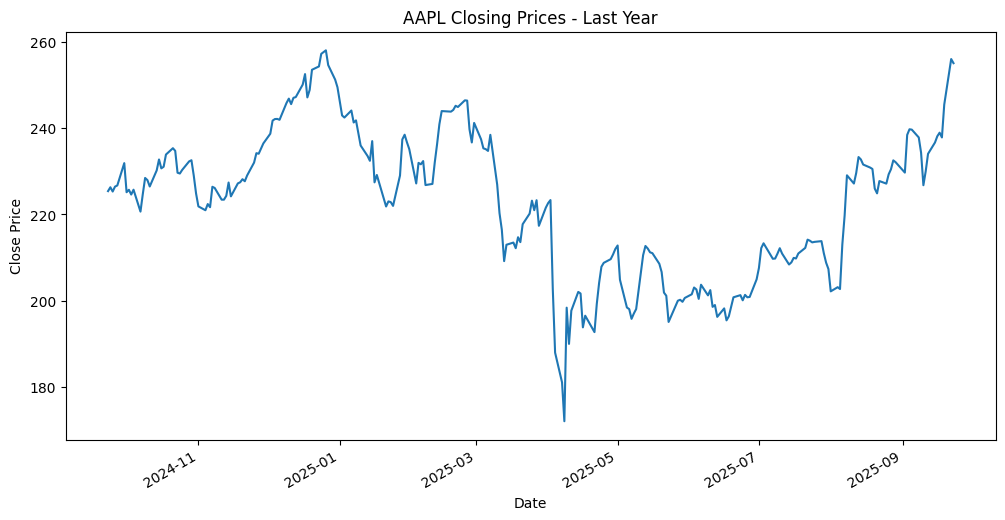

In [15]:
import matplotlib.pyplot as plt

historical_data['Close'].plot(figsize=(12, 6), title=f"{ticker_symbol} Closing Prices - Last Year")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()